In [1]:
import numpy as np

class Perceptron:
    
    def __init__(self, n_iters = 100, learning_rate = 0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return 1 if x > 0 else 0
    
    def fit(self,X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias 
                y_hat = self.step_function(linear_output)
                self.weights += x_i*self.lr*(y[idx] - y_hat)
                self.bias += self.lr * (y[idx] - y_hat)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)
    def get_weights(self):
        return self.weights
    def get_bias(self):
        return self.bias
    

In [2]:
import pandas as pd

df_train = pd.read_csv(r"C:\Users\franc\Documents\rna_2\embeddings_train.csv")
df_test = pd.read_csv(r"C:\Users\franc\Documents\rna_2\embeddings_test.csv")


In [3]:
df_train = df_train[(df_train['label'] == 0) | (df_train['label'] == 3)]
df_test = df_test[(df_test['label'] == 0) | (df_test['label'] == 3)]
X_test = df_test.drop('label', axis = 1)
X_train = df_train.drop('label', axis = 1)
y_test = df_test['label']
y_train = df_train['label']

In [4]:
from sklearn.manifold import TSNE

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
tsne = TSNE(n_components=2, random_state=42)
X_tsne_combined = tsne.fit_transform(X_combined)

In [5]:
y_combined[y_combined == 3] = 1

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tsne_combined, y_combined, test_size=0.5, random_state=101)

In [13]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = [perceptron.predict(x) for x in X_test]

In [14]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 99.96%


In [15]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3485
           1       1.00      1.00      1.00      3537

    accuracy                           1.00      7022
   macro avg       1.00      1.00      1.00      7022
weighted avg       1.00      1.00      1.00      7022



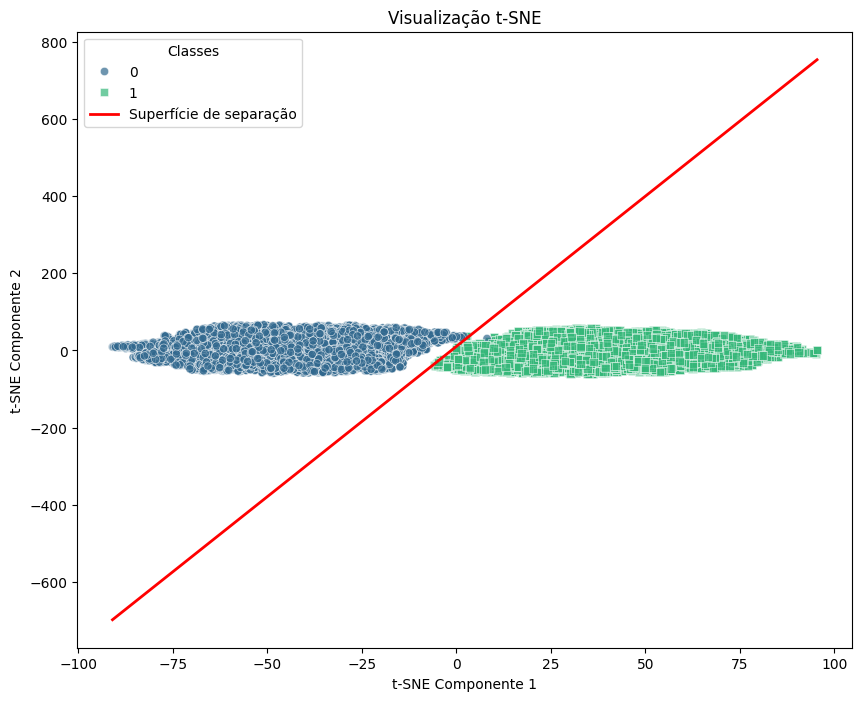

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

tsne_df = pd.DataFrame(X_tsne_combined, columns=['Component 1', 'Component 2'])
tsne_df['Class'] = y_combined  # Add the class labels to the DataFrame

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Class', palette='viridis', style='Class', markers=['o', 's'], alpha=0.7)

slope = -1*perceptron.get_weights()[0]/perceptron.get_weights()[1]
intercept = -1 * perceptron.get_bias()/perceptron.get_weights()[1]

x_values = np.linspace(tsne_df['Component 1'].min(), tsne_df['Component 1'].max(), 100)
y_values = slope * x_values + intercept  # Calculate corresponding y values

# Plot the line
plt.plot(x_values, y_values, color='red', linestyle='-', linewidth=2, label='Superfície de separação')
plt.title('Visualização t-SNE')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Classes')
plt.show()

In [11]:
perceptron.get_bias()

2.4099999999999926

In [12]:
perceptron.get_weights()

array([ 1.5081402, -0.2022699])

w1*x1 + w2*x2 + bias = 0
x2 = (-w1/w2)*x1 -bias/w2

In [13]:
slope = -1*perceptron.get_weights()[0]/perceptron.get_weights()[1]
intercept = -1 * perceptron.get_bias()/perceptron.get_weights()[1]